In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.shape

(271116, 15)

In [5]:
# Filtering Out Only season as Summer.
df=df[df['Season']=='Summer']
df.shape

(222552, 15)

In [6]:
# Now Dropping the Season Column.
df=df.drop(columns=['Season'])

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [8]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
# We can Know the Country by thier NOC.
df=df.merge(region_df,how='left',on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [10]:
# So,Now we got the Region.
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

### Some NOC are not relate to any Country

" Some National Olympic Committees (NOCs) do not have a designated region in the Olympics because they may represent countries or territories that are not recognized by the International Olympic Committee (IOC) in a regional context. These NOCs may also be in the process of gaining official recognition or may consist of territories that participate independently rather than as part of a regional grouping. Additionally, political situations or special status may affect their classification. It's important to check for the latest information as statuses can change."- `Google`

In [12]:
# checking for Duplicates
df.duplicated().sum()

1385

In [13]:
# Droping Duplicate Entries.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
pd.get_dummies(df['Medal']).astype('int')

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [15]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [16]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [17]:
df.shape

(221167, 19)

In [18]:
df[['Bronze','Gold','Silver']]=df[['Bronze','Gold','Silver']].astype(int)

In [19]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [20]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


### The Counting of Medal is Wrong.
Take an Example of India which won Hockey Olympics,so, We are Counting Entire Team's Gold Medals i.e 11 Gold ,But truth is only 1 Gold. 

In [21]:
# So,we are deleting rows with same 'Team','NOC','Games','Year','City','Sport','Event','Medal'
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [22]:
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [23]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [24]:
medal_tally['Total']=medal_tally['Bronze']+medal_tally['Gold']+medal_tally['Silver']
medal_tally.head()

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777


In [25]:
years=df['Year'].unique().tolist()

In [26]:
years.sort()

In [27]:
years.insert(0,'Overall')

In [28]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [29]:
contry=df['region'].dropna().unique().tolist()

In [30]:
contry.sort()

In [31]:
contry.insert(0,'Overall')

In [32]:
contry

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [58]:
def fetch_medal_tally(year,country):
    flag=0
    if year == 'Overall' and country=='Overall':
        temp_df=medal_df
    elif year=='Overall' and country!='Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    elif year!='Overall' and country=='Overall':
        temp_df=medal_df[medal_df['Year']==year]
    else:
        temp_df=medal_df[(medal_df['Year']==year) & (medal_df['region']==country)]
        
    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else:   
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
        
    x['Total']=x['Bronze']+x['Gold']+x['Silver']
    print(x)
        

In [59]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [60]:
fetch_medal_tally('Overall','India')

    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


## Overall Analysis

No.of Editions
No.of cities
No .of events
No. of athletes
No. of participating nations


In [73]:
len(np.unique(df['Year']).tolist()) -1 #-1 is due to not counting 1906 olympics 

28

In [74]:
len(np.unique(df['City']).tolist())

23

In [75]:
len(np.unique(df['Sport']).tolist())

52

In [76]:
len(np.unique(df['Event']).tolist())

651

In [77]:
len(np.unique(df['Name']).tolist())

116122

In [82]:
df['region'].unique().shape[0]

206

In [90]:
# Calculating year wise particiapting Nations
year_wise_countrycount=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [99]:
year_wise_countrycount.rename(columns={'Year':'Edition','count':'No of Countries'},inplace=True)

In [100]:
import plotly.express as px 

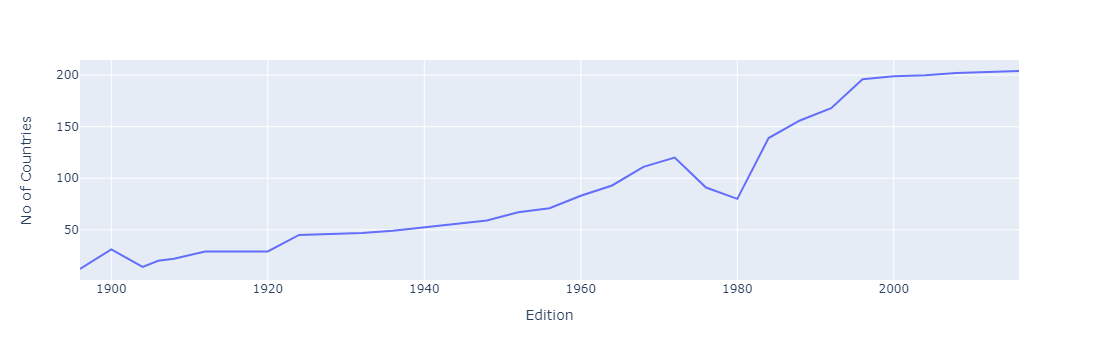

In [102]:
fig=px.line(year_wise_countrycount,x='Edition',y='No of Countries')
fig.show()

In [108]:
df.drop_duplicates(['Year','Sport','Event']).sort_values(['Year','Sport'])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
6399,4113,Anastasios Andreou,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Athina,Athletics,Athletics Men's 110 metres Hurdles,NaN,Greece,NaN,0,0,0
15524,9760,Spyridon Belokas,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Athina,Athletics,Athletics Men's Marathon,NaN,Greece,NaN,0,0,0
19135,12068,Arthur Charles Blake,M,24.0,NaN,NaN,United States,USA,1896 Summer,1896,Athina,Athletics,"Athletics Men's 1,500 metres",Silver,USA,NaN,0,0,1
26847,16616,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,1896 Summer,1896,Athina,Athletics,Athletics Men's 100 metres,Gold,USA,NaN,0,1,0
26848,16616,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,1896 Summer,1896,Athina,Athletics,Athletics Men's 400 metres,Gold,USA,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,4454,Chakir Ansari,M,25.0,168.0,57.0,Morocco,MAR,2016 Summer,2016,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Morocco,NaN,0,0,0
9317,5943,Haley Ruth Augello,F,21.0,157.0,54.0,United States,USA,2016 Summer,2016,Rio de Janeiro,Wrestling,"Wrestling Women's Flyweight, Freestyle",NaN,USA,NaN,0,0,0
13550,8571,Adam Batirov,M,31.0,165.0,71.0,Bahrain,BRN,2016 Summer,2016,Rio de Janeiro,Wrestling,"Wrestling Men's Welterweight, Freestyle",NaN,Bahrain,NaN,0,0,0
14093,8936,Rvn Bayramov,M,29.0,160.0,59.0,Azerbaijan,AZE,2016 Summer,2016,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Greco-Roman",NaN,Azerbaijan,NaN,0,0,0


In [109]:
x=df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

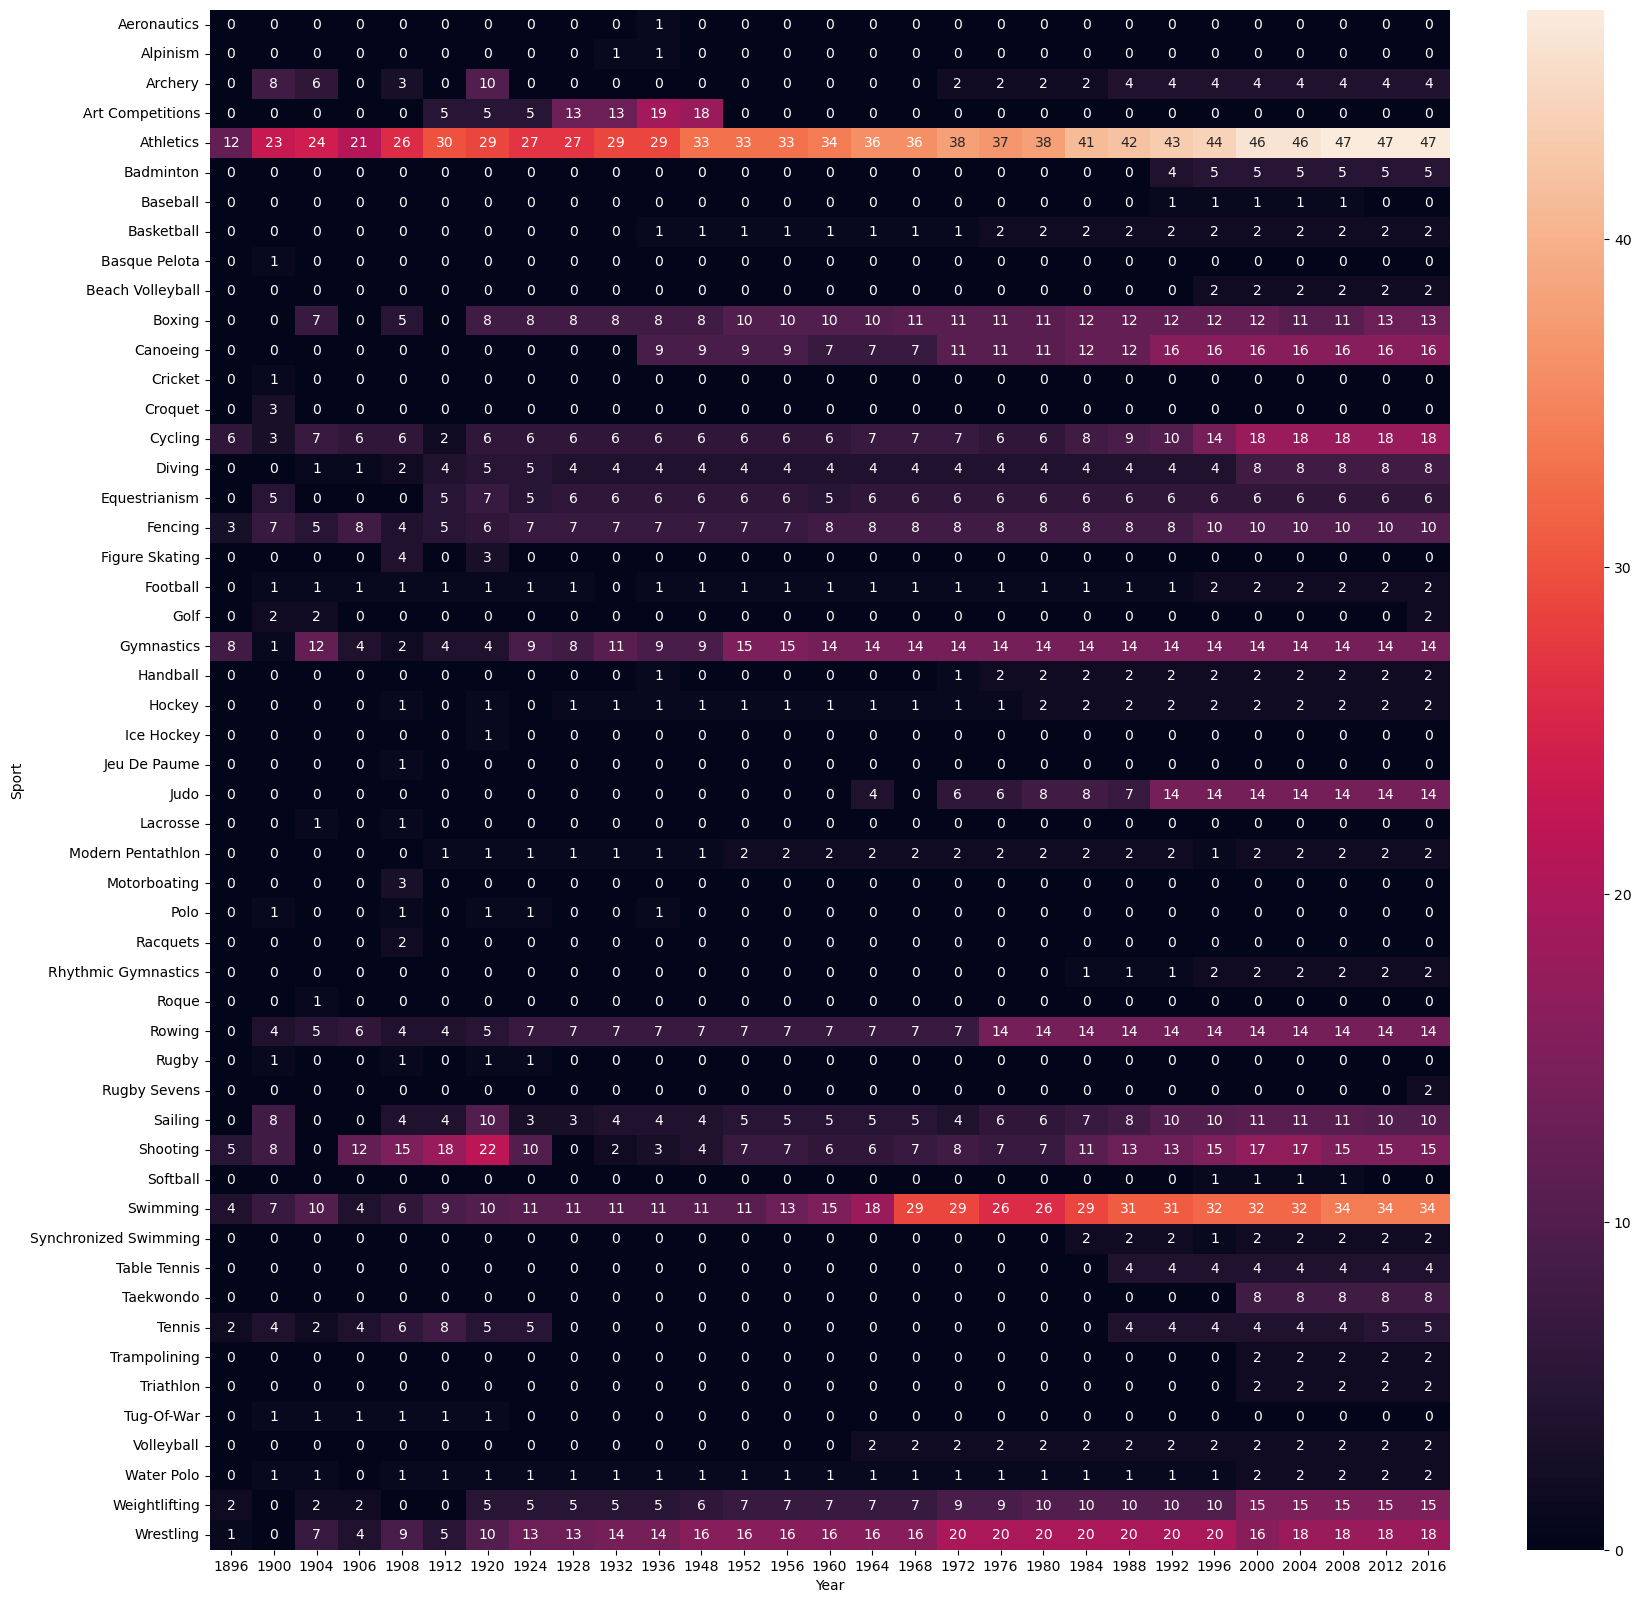

In [115]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [139]:
def most_successful(df,sport):
    # Droping rows with medal as nan
    temp_df=df.dropna(subset=['Medal'])

    if sport!='Overall':
        temp_df=temp_df[temp_df['Sport']==sport]
    #So,Now we have Athletes wrt to sport,who won Medals only.(reset_index is to convert into Dataframe)
    # taking Top 10 Only 
    x=temp_df['Name'].value_counts().reset_index().head(10).merge(df,how='left',on='Name')[['Name','count','Sport','region']].drop_duplicates('Name')
    #Reanaming Column
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [140]:
most_successful(df,'Hockey')

,Name,Medals,Sport,region
0,"Luciana Paula ""Lucha"" Aymar",4,Hockey,Argentina
4,Udham Singh Kular,4,Hockey,India
8,Teun Floris de Nooijer,4,Hockey,Netherlands
13,Leslie Walter Claudius,4,Hockey,India
17,Naomi Frances van As,3,Hockey,Netherlands
20,"Mara de la Paz ""Maripi"" Hernndez Margalot",3,Hockey,Argentina
23,Andreas Keller,3,Hockey,Germany
26,Abdul Rashid,3,Athletics,Pakistan
32,"Mara Mercedes ""Mechi"" Margalot",3,Hockey,Argentina
35,Saeed Anwar,3,Hockey,Pakistan


**country wise:**

country wise medal tally per year

what countries are good at heatmap

most succesful athletes country wise(Top 10)

In [141]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_2980\1749264335.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
new_df=temp_df[temp_df['region']=='India']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()


In [147]:
final_df

,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


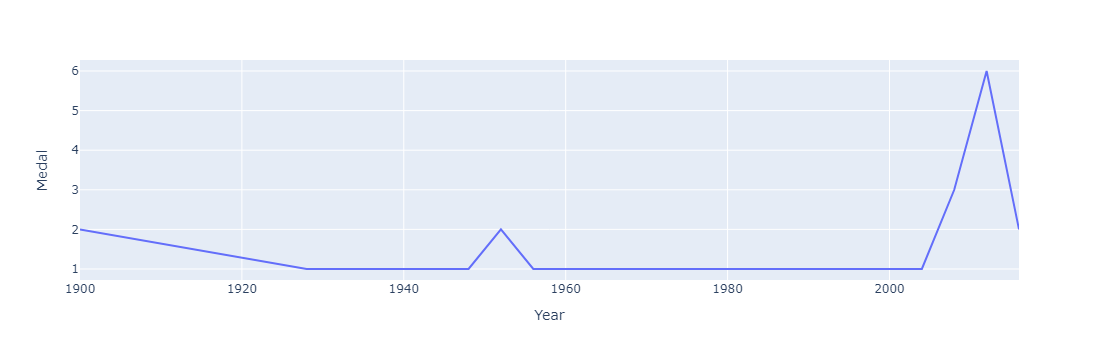

In [148]:
fig=px.line(final_df,x='Year',y='Medal')
fig.show()

In [150]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)
new_df=temp_df[temp_df['region']=='India']

C:\Users\USER\AppData\Local\Temp\ipykernel_2980\3667628387.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year', ylabel='Sport'>

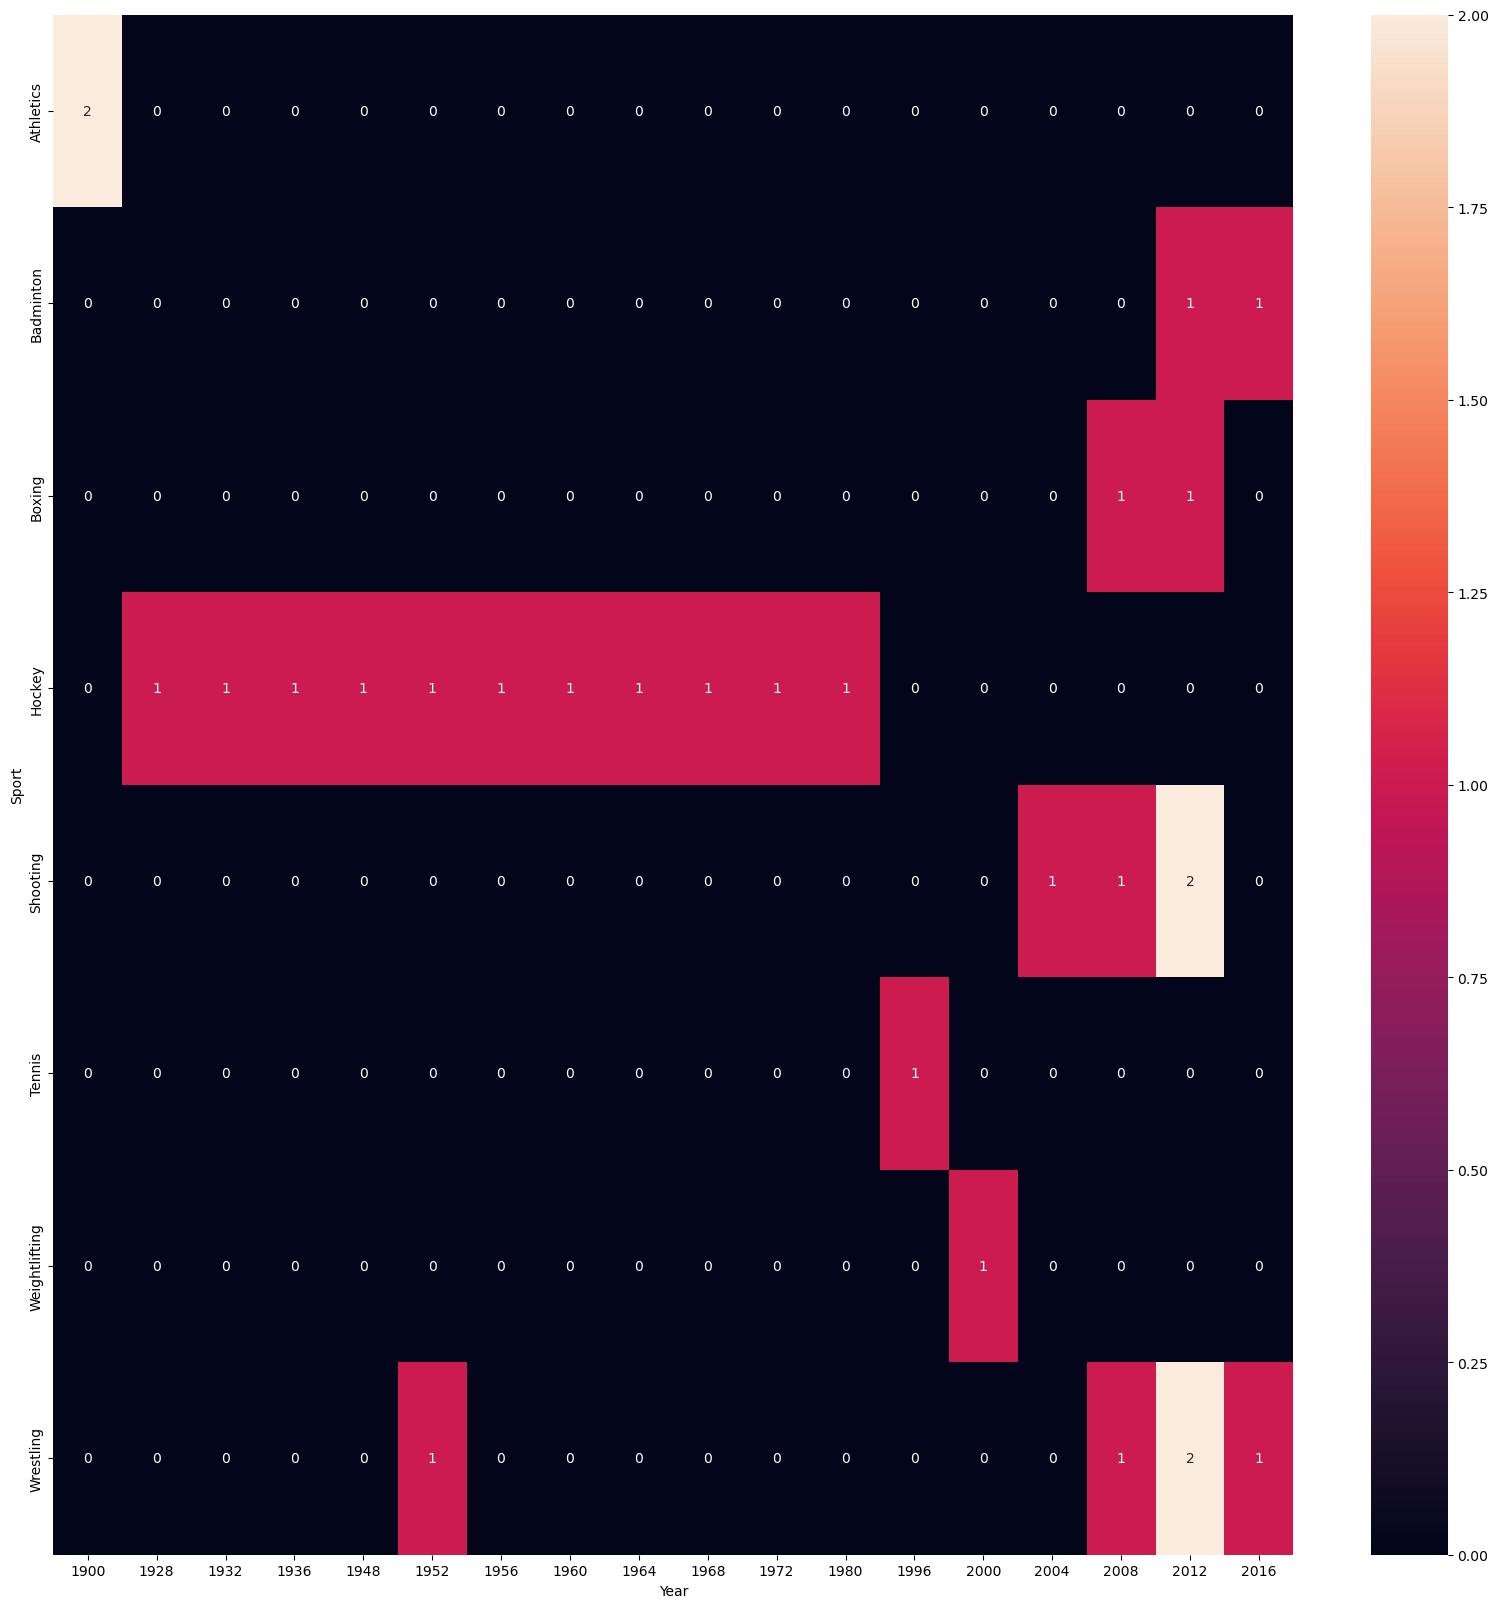

In [152]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int'),annot=True)

In [157]:
def most_successful(df,country):
    # Droping rows with medal as nan
    temp_df=df.dropna(subset=['Medal'])

    temp_df=temp_df[temp_df['region']==country]
    #So,Now we have Athletes wrt to country,who won Medals only.(reset_index is to convert into Dataframe)
    # taking Top 10 Only 
    x=temp_df['Name'].value_counts().reset_index().head(10).merge(df,how='left',on='Name')[['Name','count','Sport']].drop_duplicates('Name')
    #Reanaming Column
    x.rename(columns={'count':'Medals'},inplace=True)
    x=x.reset_index()
    x=x.drop(columns='index')
    return x

In [158]:
most_successful(df,'India')

,Name,Medals,Sport
0,Udham Singh Kular,4,Hockey
1,Leslie Walter Claudius,4,Hockey
2,Shankar Pillay Laxman,3,Hockey
3,Ranganathan Francis,3,Hockey
4,Richard James Allen,3,Hockey
5,Balbir Singh,3,Hockey
6,Harbinder Singh Chimni,3,Hockey
7,"Balbir Singh Dosanjh, Sr.",3,Hockey
8,"Victor John ""V. J."" Peter",3,Hockey
9,Dhyan Chand Bais,3,Hockey


# Athlete Analysis

In [160]:
import plotly.figure_factory as ff


In [162]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

In [163]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [169]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

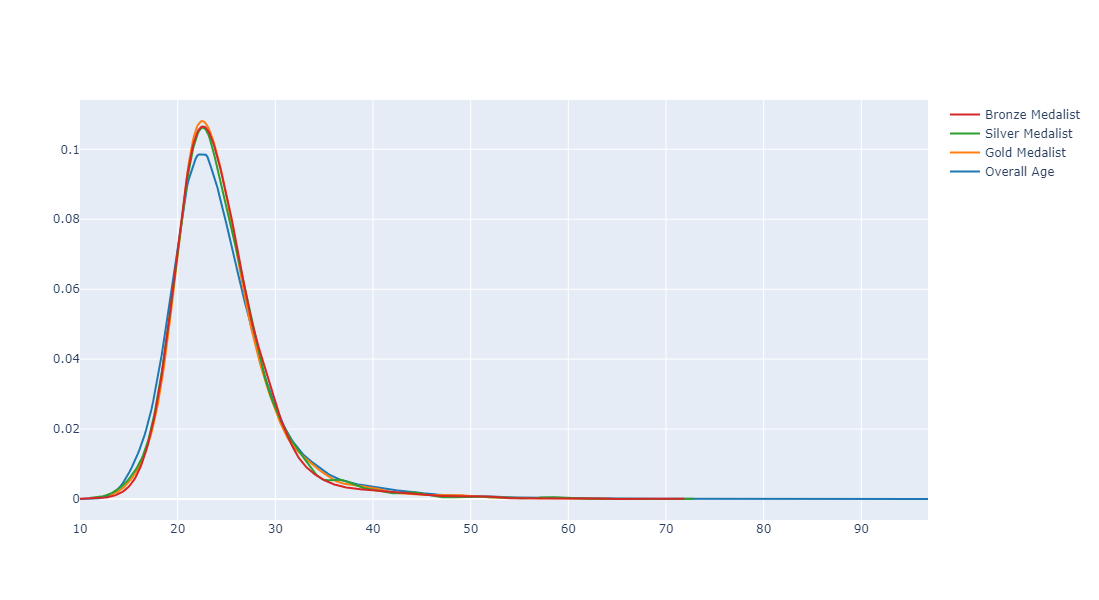

In [170]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],show_hist=False, show_rug=False)
fig.update_layout(autosize=False,width=1000,height=600)

In [171]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                 'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                 'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                 'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                 'Tennis', 'Golf', 'Softball', 'Archery',
                 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                 'Rhythmic Gymnastics', 'Rugby Sevens',
                 'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']


In [172]:
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

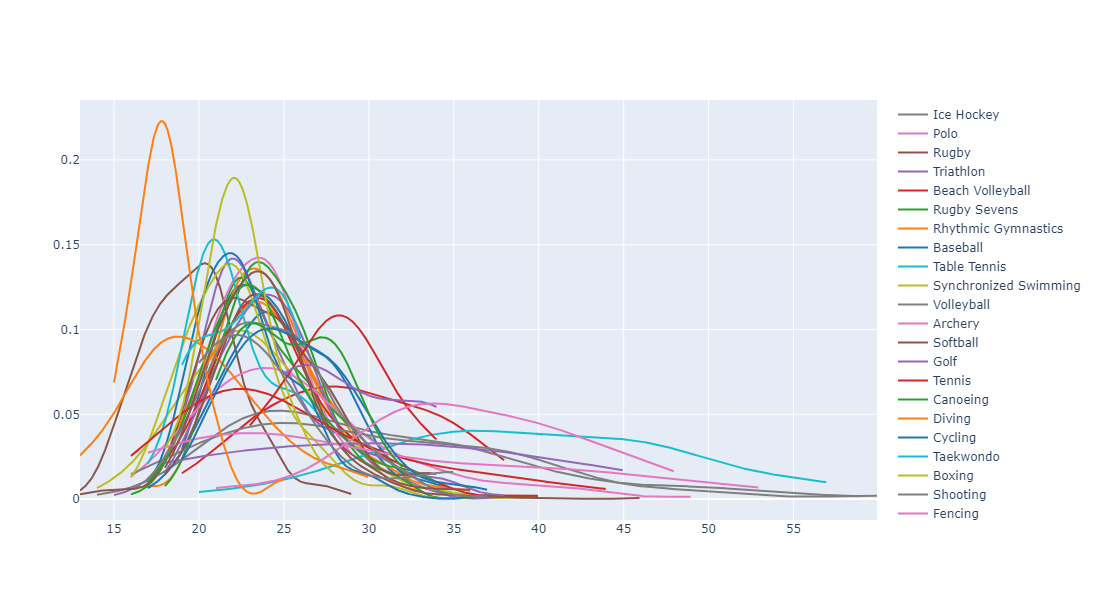

In [174]:
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600)


In [177]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

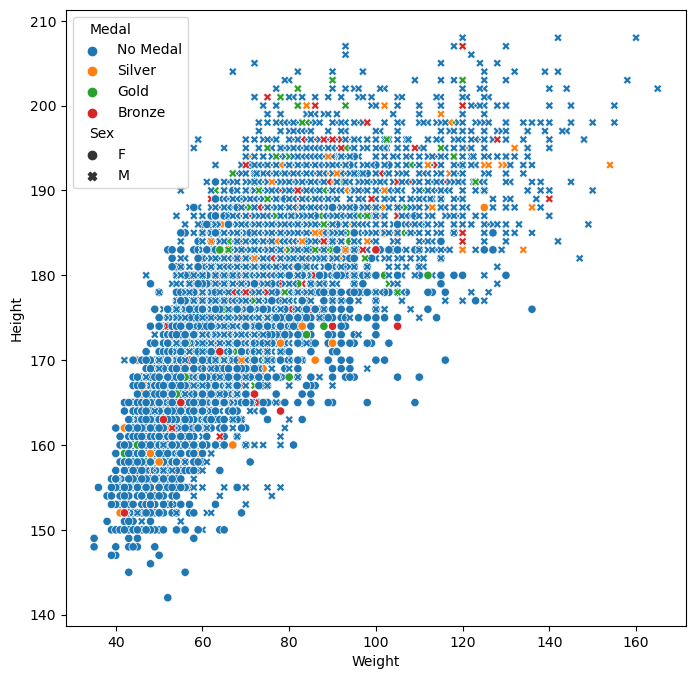

In [183]:
plt.figure(figsize=(8,8))
temp_df=athlete_df[athlete_df['Sport']=='Athletics']
sns.scatterplot(temp_df,x='Weight',y='Height',hue='Medal',style='Sex')